In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-dark')

In [2]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Q1

In [4]:
kxip_rr=matches[((matches.team1=='Kings XI Punjab') | (matches.team2=='Kings XI Punjab')) & ((matches.team1=='Rajasthan Royals') | (matches.team2=='Rajasthan Royals'))].copy()
kxip=matches[(matches.team1=='Kings XI Punjab') | (matches.team2=='Kings XI Punjab')].copy()
rr=matches[(matches.team1=='Rajasthan Royals') | (matches.team2=='Rajasthan Royals')].copy()
kxip_rr.shape,kxip.shape,rr.shape

((19, 18), (176, 18), (147, 18))

In [5]:
kxip_rrdeli=deliveries[((deliveries.batting_team=='Kings XI Punjab') | (deliveries.bowling_team=='Kings XI Punjab')) & ((deliveries.batting_team=='Rajasthan Royals') | (deliveries.bowling_team=='Rajasthan Royals'))].copy()
kxipdeli=deliveries[(deliveries.batting_team=='Kings XI Punjab') | (deliveries.bowling_team=='Kings XI Punjab')].copy()
rrdeli=deliveries[(deliveries.batting_team=='Rajasthan Royals') | (deliveries.bowling_team=='Rajasthan Royals')].copy()
kxip_rrdeli.shape,kxipdeli.shape,rrdeli.shape

((4663, 21), (41713, 21), (34674, 21))

In [6]:
kxip_rr.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
64,65,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
96,97,2008,Chandigarh,2008-05-28,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,41,0,SE Marsh,"Punjab Cricket Association Stadium, Mohali",SJ Davis,K Hariharan,NaN
129,130,2009,Cape Town,2009-04-26,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Kings XI Punjab,27,0,KC Sangakkara,Newlands,M Erasmus,K Hariharan,NaN
144,145,2009,Durban,2009-05-05,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,78,0,GC Smith,Kingsmead,SS Hazare,IL Howell,NaN
192,193,2010,Chandigarh,2010-03-24,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,31,0,AC Voges,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,SK Tarapore,NaN


In [7]:
kxip.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN


In [8]:
rr.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
61,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
64,65,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
67,68,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN
69,70,2008,Bangalore,2008-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,SR Watson,M Chinnaswamy Stadium,MR Benson,IL Howell,NaN
77,78,2008,Jaipur,2008-05-01,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar,NaN


In [9]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='lightgreen')
        ax[i].set_title(columns[i])

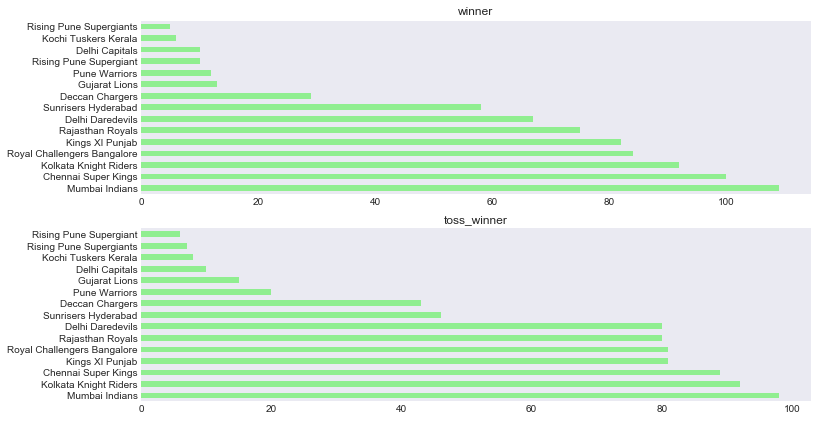

In [10]:
cat_plot(matches,['winner',
                  'toss_winner'],(12,7),'barh')

In [40]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],colors=['lavender',
                                                                           'honeydew'],autopct='%2.f%%')
        ax[i].set_title(columns[i])

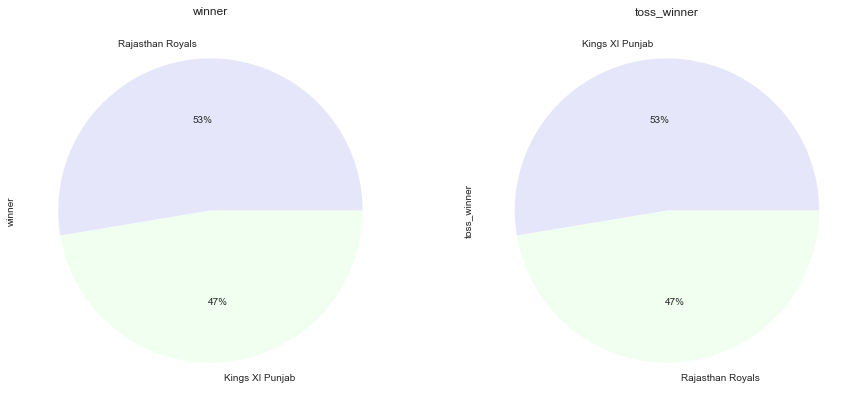

In [41]:
cat_plot(kxip_rr,['winner',
                  'toss_winner'],(15,8),'pie')

### As it is evident from the above exploration rr will most probably win the match

# Q2

In [82]:
boundary_runs=kxip_rrdeli[kxip_rrdeli.batsman_runs>=4].groupby(['match_id',
                                                                'batsman']).count().batsman_runs
boundary_runs

match_id  batsman      
65        DS Lehmann       3
          IK Pathan        1
          JR Hopes         2
          K Goel           5
          KC Sangakkara    4
                          ..
11323     MA Agarwal       3
          R Ashwin         3
          RA Tripathi      4
          STR Binny        5
          SV Samson        2
Name: batsman_runs, Length: 207, dtype: int64

In [83]:
boundary_runs=kxip_rrdeli[kxip_rrdeli.batsman_runs>=4].groupby(['match_id',
                                                                'batsman']).count().batsman_runs
total_bman_runs=kxip_rrdeli.groupby(['match_id',
                                     'batsman']).sum().batsman_runs

Text(0.5, 1.0, 'Frequency distribution of the ratio of # of runs score through boundaries/total runs of the batsman')

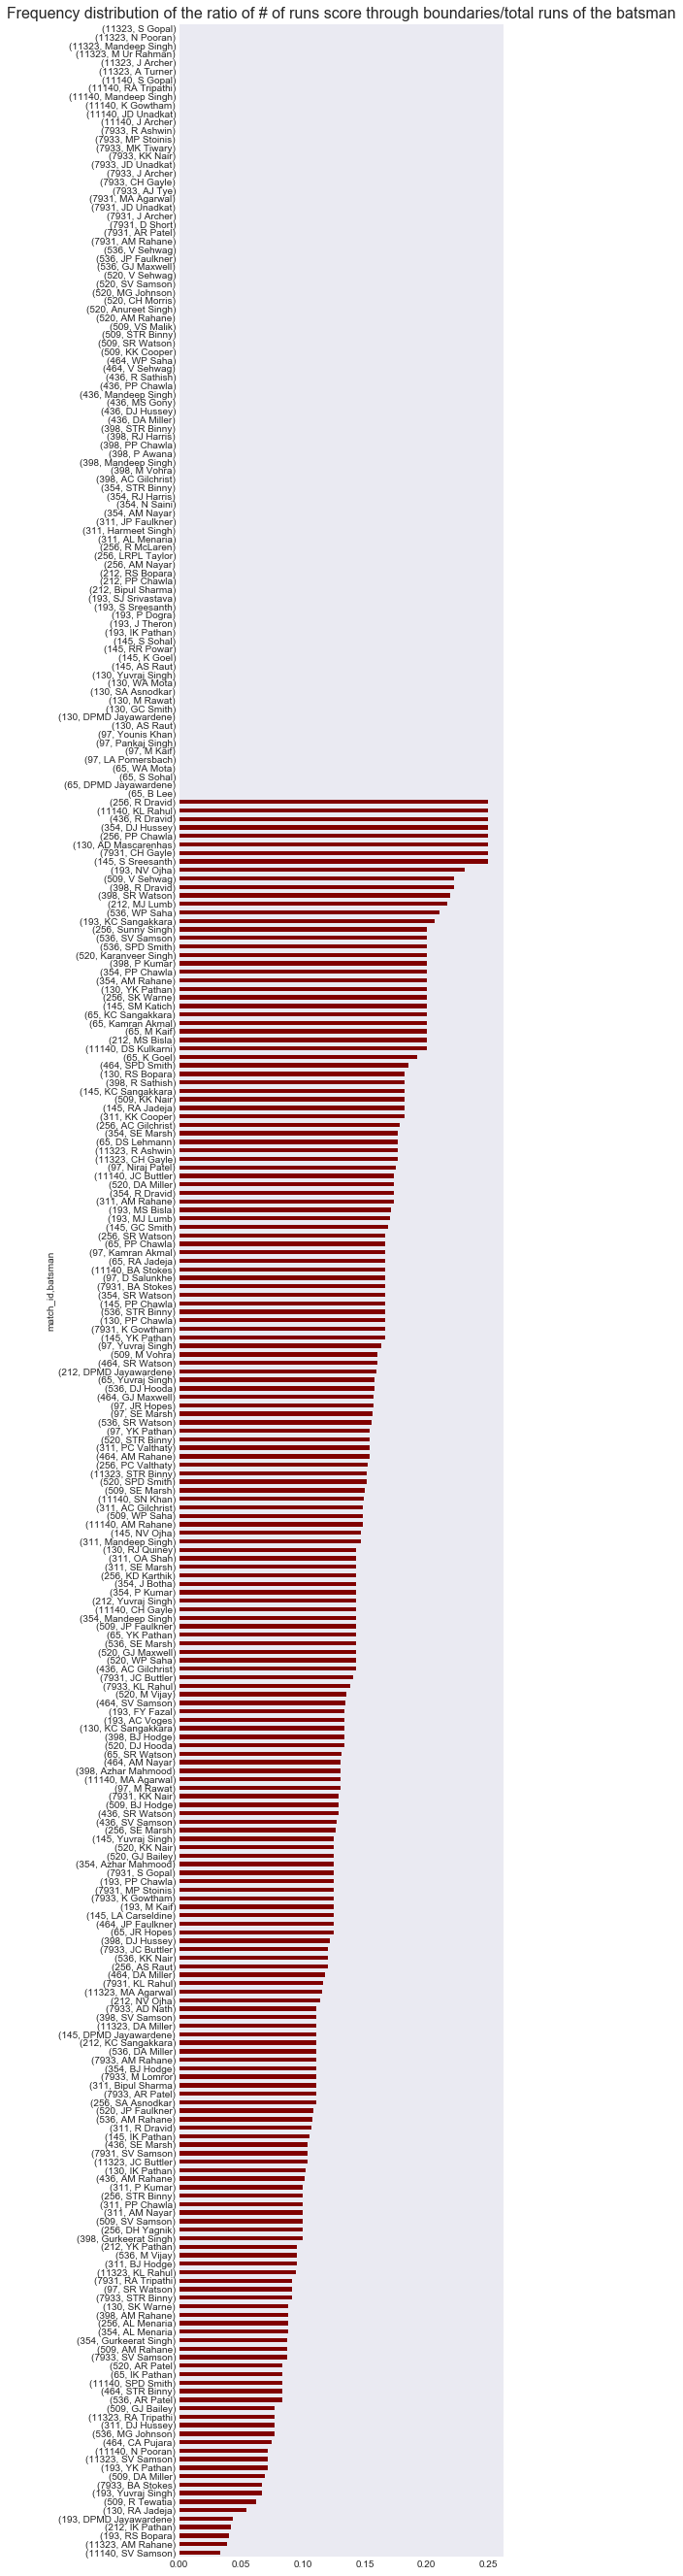

In [85]:
(boundary_runs/total_bman_runs).sort_values(ascending=True).plot.barh(figsize=(6,48),
                                                                      color='maroon',
                                                                      )
plt.title('Frequency distribution of the ratio of # of runs score through boundaries/total runs of the batsman',fontsize=16)

### From the above distribution we can observe that KL Rahul or Sanju Samson will be the answer

# Q3

- Calculation elements for OPP of batsmen ⇩

In [150]:
total_runs_bman=kxip_rrdeli.groupby(['match_id',
                                     'batsman']).batsman_runs.sum()

no_ofballs_bman=kxip_rrdeli.groupby(['match_id',
                                     'batsman',
                                     'over']).ball.count()

runs_boundaries=kxip_rrdeli.query('batsman_runs>=4').groupby(['match_id',
                                                              'batsman']).batsman_runs.sum()

runs_123=kxip_rrdeli.query('batsman_runs==1 | batsman_runs==2 | batsman_runs==3').groupby(['match_id',
                                                                                           'batsman']).batsman_runs.sum()

In [151]:
opp_bman=(((total_runs_bman/no_ofballs_bman)+runs_boundaries-runs_123)/no_ofballs_bman)
opp=pd.DataFrame({'opp_bman':opp_bman,})
opp['normalised_oppbman']=opp.opp_bman.map(lambda x:(x-opp.opp_bman.min())/(opp.opp_bman.max()-opp.opp_bman.min()))
opp

opp_bman  normalised_oppbman
match_id batsman          over                               
65       B Lee            18          NaN                 NaN
         DPMD Jayawardene 7           NaN                 NaN
                          8           NaN                 NaN
         DS Lehmann       6      4.222222            0.041878
                          7     24.000000            0.154822
...                                   ...                 ...
11323    SV Samson        8     -0.888889            0.012690
                          9     -0.888889            0.012690
                          10    -0.888889            0.012690
                          11     1.000000            0.023477
                          12    -0.888889            0.012690

[1589 rows x 2 columns]

In [146]:
opp.normalised_oppbman.max(),opp.normalised_oppbman.min()

(1.0, 0.0)

- Calculation elements for OPP of bowlers ⇩

In [155]:
boundary_runs_given=kxip_rrdeli.query('batsman_runs>=4').groupby(['match_id',
                                                                  'bowler']).batsman_runs.sum()

boundary_balls_bowled=kxip_rrdeli.groupby(['match_id',
                                          'batsman',
                                          'over']).ball.count()

total_balls_bowled=kxip_rrdeli.groupby(['match_id',
                                       'bowler']).ball.count()

In [160]:
opp_bowl=((boundary_runs_given/boundary_balls_bowled)/total_balls_bowled)
oppb=pd.DataFrame({'opp_bowl':opp_bowl})
oppb['normalised_oppbowl']=oppb.opp_bowl.map(lambda x:(x-oppb.opp_bowl.min())/(oppb.opp_bowl.max()-oppb.opp_bowl.min()))
oppb

opp_bowl  normalised_oppbowl
match_id bowler  over batsman                                       
65       B Lee   18   B Lee             0.500000            0.181234
                 7    DPMD Jayawardene  0.500000            0.181234
                 8    DPMD Jayawardene  0.333333            0.118252
                 6    DS Lehmann        0.333333            0.118252
                 7    DS Lehmann        1.000000            0.370180
...                                          ...                 ...
11323    S Gopal 8    SV Samson         0.194444            0.065767
                 9    SV Samson         0.194444            0.065767
                 10   SV Samson         0.194444            0.065767
                 11   SV Samson         0.291667            0.102506
                 12   SV Samson         0.194444            0.065767

[17727 rows x 2 columns]

In [161]:
oppb.normalised_oppbowl.max(),oppb.normalised_oppbowl.min()

(1.0, 0.0)

Text(0.5, 1.0, 'Bowlers OPP')

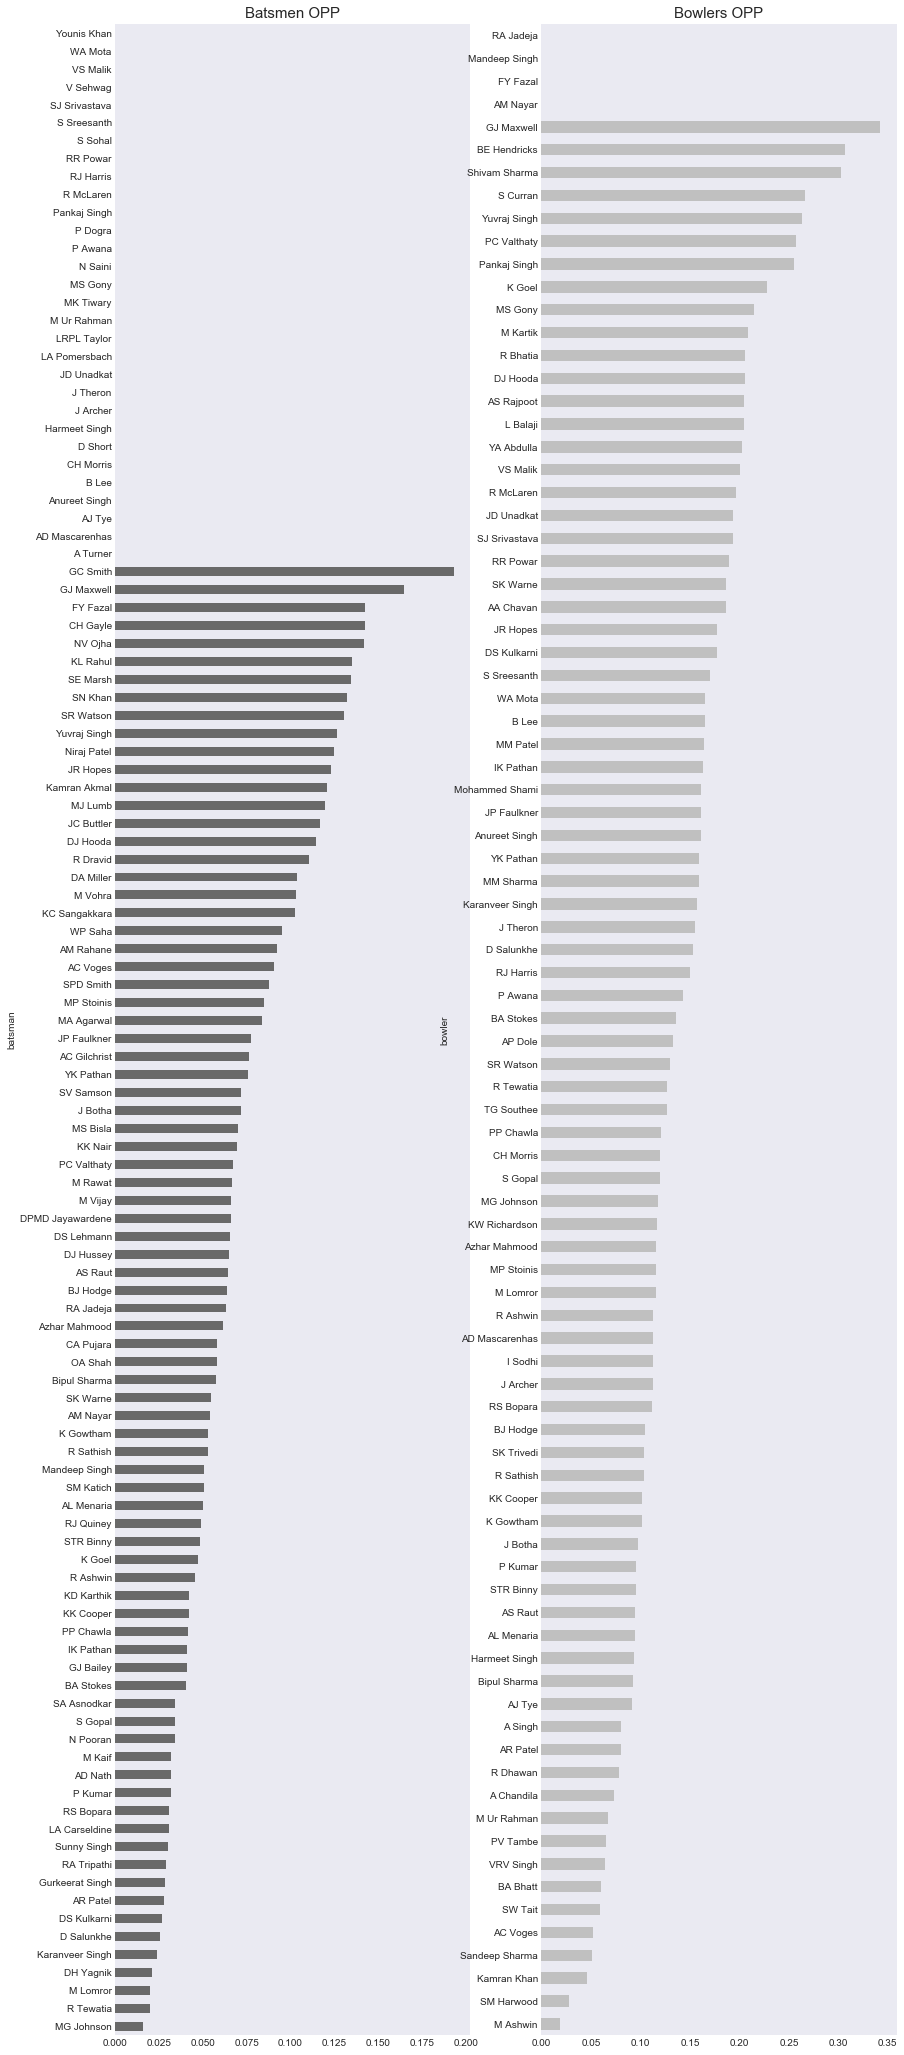

In [172]:
fig,ax=plt.subplots(ncols=2,figsize=(14,37))
opp.normalised_oppbman.groupby('batsman').mean().sort_values().plot.barh(ax=ax[0],
                                                                         color='dimgray')
oppb.normalised_oppbowl.groupby('bowler').mean().sort_values().plot.barh(ax=ax[1],
                                                                         color='silver')
ax[0].set_title('Batsmen OPP',
                fontsize=15)
ax[1].set_title('Bowlers OPP',
                fontsize=15)

### As we can observe from the above analysis

# Q4

In [86]:
dotballs=kxip_rrdeli[kxip_rrdeli.batsman_runs==0].groupby(['match_id']).count().ball
dotballs.describe()

count     19.000000
mean      96.263158
std       16.689458
min       70.000000
25%       86.500000
50%       91.000000
75%      113.000000
max      130.000000
Name: ball, dtype: float64

Text(0.5, 1.0, 'Dot ball Frequency distribution of RR and KXIP')

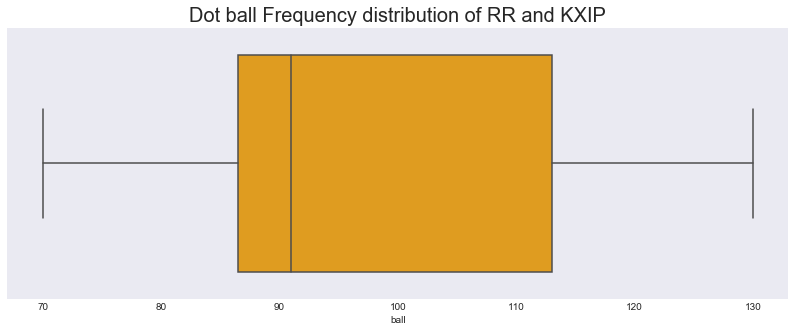

In [90]:
# dotballs.plot.hist(figsize=(12,5),color='purple')
plt.figure(figsize=(14,5))
sns.boxplot(dotballs,color='orange')
plt.title('Dot ball Frequency distribution of RR and KXIP',fontsize=20)

### As we can see dot balls are likely to happen within the range of 86 to 100

# Q5

In [93]:
mohammad_out=deliveries[deliveries.batsman=='Mohammed Shami'].groupby(['match_id','over','ball'],as_index=False).count()
mohammad_out.head()

,match_id,over,ball,inning,batting_team,bowling_team,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,18,20,6,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
1,35,16,6,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
2,35,17,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
3,35,17,5,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
4,35,17,6,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [94]:

def wickounter():
    val=[]
    counter=0
    for i in mohammad_out.dismissal_kind:
        if i==0:
            counter+=1
        else:
            val.append((counter,'out'))
            #val.append('out')
            counter=0
    return val



wickounter()

[(4, 'out'),
 (3, 'out'),
 (5, 'out'),
 (8, 'out'),
 (9, 'out'),
 (3, 'out'),
 (3, 'out'),
 (9, 'out'),
 (0, 'out')]

In [95]:
arr=[]
for _ in wickounter():
    arr.append(_[0])
arr=np.array(arr)
arr


array([4, 3, 5, 8, 9, 3, 3, 9, 0])

Mean 4.888888888888889 	 Standard Deviation 2.960647243216495


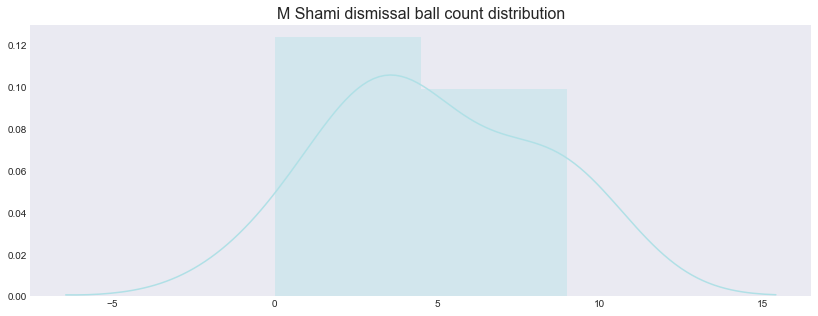

In [108]:
plt.figure(figsize=(14,5))
sns.distplot(arr,color='powderblue')
plt.title('M Shami dismissal ball count distribution',fontsize=16)
print('Mean',arr.mean(),'\t','Standard Deviation',arr.std())

### Observing the above graph we can say that Shami will get out within his 1st 10 balls